Lab 5 (Social Network Analysis) - Reddit - Part 3

The scipt reads user interaction data from a CSV file created in Part 2:
- each row represents an interaction between two Reddit users, with a weight indicating the number of interactions. 
- a directed graph representing these interactions. 

The script identifies the top 10 highly influential users based on the total replies they've received. 
Finally, it visualizes the directed user interaction network, highlighting the influential users in red, providing insights into the most active users and their interactions on subreddit.

After this, you could try the similar visualization of the network using Gelphi, instead of coding.

## Apex Legends

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the CSV file containing user interactions
df = pd.read_csv("user_user_interaction_network.csv")

# Step 2: Create the user interaction network as a directed graph
G = nx.Graph()

for index, row in df.iterrows():
    source_user = row["source"]
    target_user = row["target"]
    weight = row["weight"]
    
    # Add edges with weights to the directed graph
    if G.has_edge(source_user, target_user):
        G[source_user][target_user]["weight"] += weight
    else:
        G.add_edge(source_user, target_user, weight=weight)

In [3]:
# Step 3: Analyze the most influential users
influential_users = sorted(G.nodes(), key=lambda x: sum(d["weight"] for _, _, d in G.edges(x, data=True)), reverse=True)[:10]

print("Top 10 Highly Influential Users:")
for user in influential_users:
    total_weight = sum(d["weight"] for _, _, d in G.edges(user, data=True))
    print(f"{user}: Total Replies Received - {total_weight}")

Top 10 Highly Influential Users:
mnkymnk: Total Replies Received - 58
elpinko: Total Replies Received - 37
SaveVideo: Total Replies Received - 25
hiticonic: Total Replies Received - 23
grahamw01: Total Replies Received - 22
DPotatomaniac: Total Replies Received - 20
Kaldricus: Total Replies Received - 18
H4xolotl: Total Replies Received - 17
blackviking147: Total Replies Received - 16
rkrigney: Total Replies Received - 15


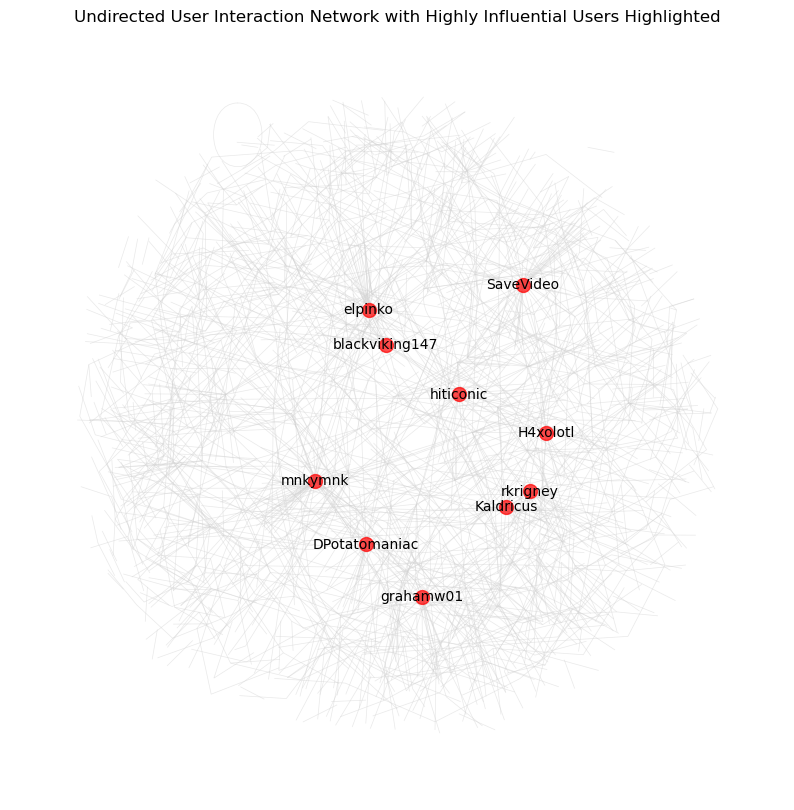

In [8]:
# Step 4: Visualize the undirected graph with highly influential users and others
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1, iterations=50)

# Draw edges in light grey
nx.draw_networkx_edges(G, pos, edge_color="lightgrey", alpha=0.5, width=0.5)

# Draw influential users in red
influential_user_nodes = [node for node in G.nodes() if node in influential_users]
nx.draw_networkx_nodes(G, pos, nodelist=influential_user_nodes, node_size=100, node_color='red', alpha=0.7)

# # Draw other nodes in grey
# other_nodes = [node for node in G.nodes() if node not in influential_users]
# nx.draw_networkx_nodes(G, pos, nodelist=other_nodes, node_size=10, node_color='grey', alpha=0.5)

nx.draw_networkx_labels(G, pos, labels={user: user for user in influential_user_nodes}, font_size=10, font_color='black')

plt.title("Undirected User Interaction Network with Highly Influential Users Highlighted")
plt.axis('off')
plt.show()

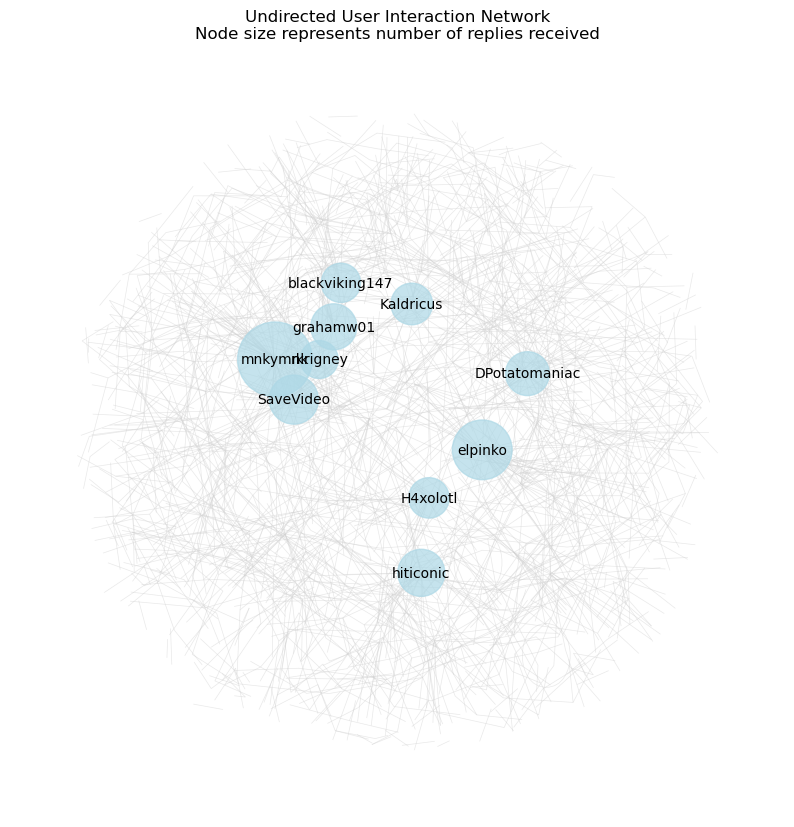

In [27]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1, iterations=50)

# Draw edges in light grey
nx.draw_networkx_edges(G, pos, edge_color="lightgrey", alpha=0.5, width=0.5)

# Calculate reply weights for influential users
reply_weights = {user: sum(d["weight"] for _, _, d in G.edges(user, data=True)) for user in influential_users}

# Scale node sizes based on reply weights
# Using a base size of 100 and scaling up based on weights
node_sizes = [reply_weights[node] * 50 for node in influential_user_nodes]  # Adjust multiplier as needed

# Draw influential users with varying sizes
nx.draw_networkx_nodes(G, pos, 
                      nodelist=influential_user_nodes, 
                      node_size=node_sizes,
                      node_color='lightblue', 
                      alpha=0.7)

# # Draw other nodes in grey
# nx.draw_networkx_nodes(G, pos, 
#                       nodelist=other_nodes, 
#                       node_size=10, 
#                       node_color='grey', 
#                       alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={user: user for user in influential_user_nodes}, font_size=10, font_color='black')

plt.title("Undirected User Interaction Network\nNode size represents number of replies received")
plt.axis('off')
plt.show()

In [6]:
between_cent = nx.betweenness_centrality(G)
degree_cent = nx.degree_centrality(G)
eigen_cent = nx.eigenvector_centrality(G)

print(sorted(between_cent.items(), key=lambda x:x[1], reverse=True))
print(sorted(degree_cent.items(), key=lambda x:x[1], reverse=True))
print(sorted(eigen_cent.items(), key=lambda x:x[1], reverse=True))


[('elpinko', 0.12851473941726055), ('mnkymnk', 0.12710822586331583), ('Rudy_Ghouliani', 0.12054629199297658), ('Fubbles22', 0.09723760816892019), ('twiz__', 0.09429567046678446), ('spirit32', 0.087810434881643), ('rkrigney', 0.07788428126244407), ('poodlebutt76', 0.07638341056671666), ('-Mateo-', 0.0704715648501833), ('ThumYorky', 0.06992132841576341), ('Kaldricus', 0.0696724524738233), ('saucypotato27', 0.0641593273033895), ('machmademax', 0.06051345918524977), ('hiticonic', 0.06046556568464905), ('rickybalbroah', 0.05704438134013644), ('DoctorOzface', 0.0569457555679576), ('2girls_1Fort', 0.051320189122667476), ('Rengiil', 0.049825610367706545), ('Djason_Unchaind', 0.04821307443595749), ('lynxz', 0.04672709895846628), ('mazu74', 0.04630320139890093), ('Dillywink', 0.04219449351755941), ('ThinkingSentry', 0.04044572277044147), ('nogoodgreen', 0.039965758334494735), ('Pragmatic218', 0.03987197296975663), ('ancilot1', 0.03767490121449704), ('Hirosensei2', 0.03757837057776009), ('Arman27